Total Stiffness Matrix:
 [[ 18900.  18900. -18900.  18900.      0.      0.]
 [ 18900.  25200. -18900.  12600.      0.      0.]
 [-18900. -18900.  37800.      0. -18900.  18900.]
 [ 18900.  12600.      0.  50400. -18900.  12600.]
 [     0.      0. -18900. -18900.  18900. -18900.]
 [     0.      0.  18900.  12600. -18900.  25200.]]
Displacement:
 [[ 0.        ]
 [ 0.        ]
 [-0.00092593]
 [-0.00019841]
 [ 0.        ]
 [ 0.00079365]]
Reactions:
 [[ 13.75]
 [ 15.  ]
 [-20.  ]
 [  0.  ]
 [  6.25]
 [  0.  ]]
Shear Force and Bending Moment for element 1: 
 [[ 13.75]
 [ 15.  ]
 [-13.75]
 [ 12.5 ]]


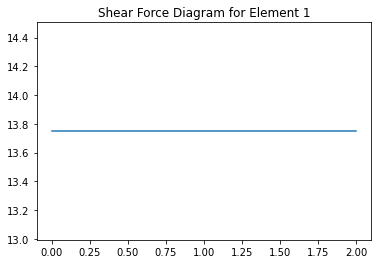

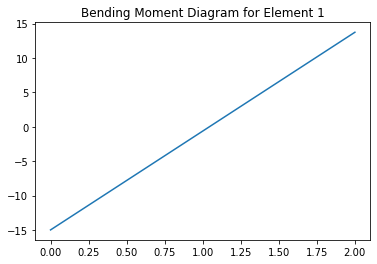

Shear Force and Bending Moment for element 2: 
 [[ -6.25]
 [-12.5 ]
 [  6.25]
 [  0.  ]]


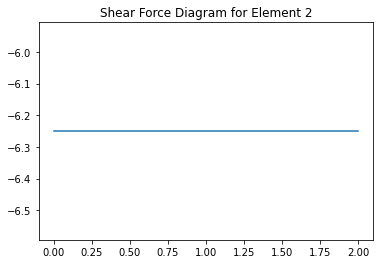

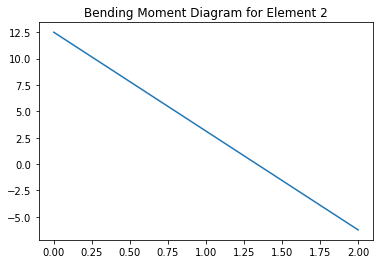

In [8]:
import numpy as np
import matplotlib.pyplot as plt

E=2.1e8
I=60e-6
P=20
L=[2,2]
no_of_nodes = 3
u = [0,0,1,1,0,1]
F = np.array([-P,0,0]).reshape((3,1))

total_stiffness_matrix = np.zeros((2*no_of_nodes,2*no_of_nodes))
k_matrix={}

for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2,-6*L[j], 2*L[j]**2],
                [-12, -6*L[j], 12, -6*L[j]],
                [6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  total_stiffness_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]

print("Total Stiffness Matrix:\n",total_stiffness_matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*number_of_nodes):
  for j in range(2*number_of_nodes):
    if u[i]*u[j] == 1:
      reduced_m.append(total_stiffness_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))
#print(reduced_m)

rotation_m = np.linalg.solve(reduced_m, F)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*number_of_nodes,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(total_stiffness_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  print('Shear Force and Bending Moment for element ' + str(i+1) +': \n', force_mat)
  #xValue=[0,L[i]]
  #yValue=[force_mat[0],force_mat[0]]
 
  plt.figure()
  plt.title('Shear Force Diagram for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.savefig('Shear Force Diagram '+str(i+1)+'.png')
  
  plt.figure()
  plt.title('Bending Moment Diagram for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.savefig('Bending Moment Diagram for Element '+str(i+1)+'.png')
 
  plt.show()
